In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import config
from config import ANALYSIS_SUBDIRS as PATH

sns.set(color_codes=True)

In [10]:
from os.path import isfile, isdir, join, dirname, realpath, splitext


'F:\\idp\\acquisition_analysis'

In [17]:
col_cur_employer = 'cur_employer'
col_cur_job_start = 'cur_job_start'
col_cur_job_end = 'cur_job_end'

col_next_employer = 'next_employer'
col_next_job_start = 'next_job_start'
col_days_to_next_job = 'days_to_next_job'
col_months_to_next_job = 'months_to_next_job'

col_second_next_employer = 'second_next_employer'
col_second_next_job_start = 'second_next_job_start'
col_days_to_second_next_job = 'days_to_second_next_job'
col_months_to_second_next_job = 'months_to_second_next_job'

col_E = 'E'
col_E_in_profile = 'E_in_profile'
col_E_timeframe = 'E_timeframe'

col_R = 'R'
col_R_in_profile = 'R_in_profile'
col_R_timeframe = 'R_timeframe'

col_E_in_profile_prior_acq = 'E_in_profile_prior_acq'
col_E_timeframe_prior_acq = 'E_timeframe_prior_acq'

col_R_in_profile_prior_acq = 'R_in_profile_prior_acq'
col_R_timeframe_prior_acq = 'R_timeframe_prior_acq'

In [18]:
def parse_chained_str(chained_str):
    return chained_str.split(' | ')

In [21]:
data_type = {'author_id': int,
             # col_days_to_next_job: int,
             # col_months_to_next_job: int,
             # col_days_to_second_next_job: int,
             # col_months_to_second_next_job: int,
             }
file = glob.glob(f'{PATH.FINAL_DATA}/{config.CUR_GROUP}__*acquisition*.csv')[-1]
print(file)
df = pd.read_csv(file, delimiter=',', header=0, dtype=data_type)
df = df.mask(df.isna(), other=None)

group_names = ['Only E', 'E to R', 'E to O',
               'Only R', 'R to E', 'R to O',
               'Cur. O', 'No cur. job']

F:\idp\acquisition_analysis\analysis\final_data\treatment__employment_continuity_by_acquisition_2020_09_25_15_14.csv


In [22]:
only_E = list()
E_to_R = list()
E_to_O = list()

only_R = list()
R_to_E = list()
R_to_O = list()

cur_O = list()
no_cur_job = list()

for i, row in df.iterrows():
    if row[col_cur_employer] is None:
        no_cur_job.append(row)
        continue

    cur_employers = set(parse_chained_str(row[col_cur_employer]))
    next_employer = row[col_next_employer]
    if 'E' in cur_employers:
        if next_employer is None or next_employer == 'E':
            if next_employer == 'E':
                print(row.author_id)
            only_E.append(row)
        elif next_employer == 'R':
            E_to_R.append(row)
        else:
            E_to_O.append(row)
    elif 'R' in cur_employers:
        if next_employer == 'R' or next_employer is None:
            only_R.append(row)
        elif next_employer == 'E':
            R_to_E.append(row)
        else:
            R_to_O.append(row)
    else:
        cur_O.append(row)
        
all_groups = [only_E, E_to_R, E_to_O,
              only_R, R_to_E, R_to_O,
              cur_O, no_cur_job]

506416
2271791


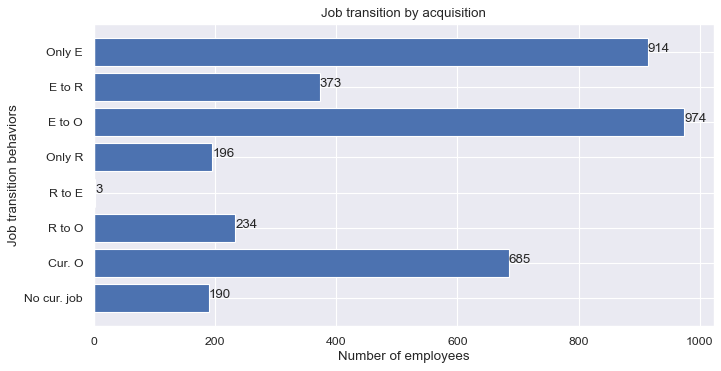

In [31]:
def _write_bar_text(orient, counts, plt):
    """
    Writes text/number on top of each column in a bar plot
    Args:
        orient (str): either 'v' (for vertical bar plot) for 'h' (for horizontal bar plot) 
        counts (list<int>): the list of counts that each column in the bar plot represents 
        plt (matplotlib.plot): the bar plot itself
    """
    bar_count = len(counts)
    if orient == 'v':
        for c in range(bar_count):
            plt.text(c - 0.25, counts[c] + 15, str(counts[c]))
    elif orient == 'h':
        for c  in range(bar_count):
            plt.text(counts[c], c, str(counts[c]))
        
def plot_group_counts(groups, labels, orient):
    """
    Plots a bar plot based on the employee counts of the 8 job transition groups
    Args:
        groups (list<list<pandas.DataFrame.iterrows>>): the list of 8 job transition groups
        labels (list<str>): names of 8 job transition groups
        orient (str): either 'v' (for vertical bar plot) for 'h' (for horizontal bar plot) 

    Returns:

    """
    if orient != 'v' and orient != 'h':
        print("ERROR: Parameter `orient` must be either 'v' or 'h'")
        return
    
    counts = [len(g) for g in groups]
    
    plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
    if orient == 'h':
        plt.barh(labels, counts)
        plt.gca().invert_yaxis()
    elif orient == 'v':
        plt.bar(labels, counts)
        
    _write_bar_text(orient, counts, plt)
    plt.ylabel('Job transition behaviors')
    plt.xlabel('Number of employees')
    plt.title('Job transition by acquisition')
    plt.show()
    
plot_group_counts(groups=all_groups, labels=group_names, orient='h')

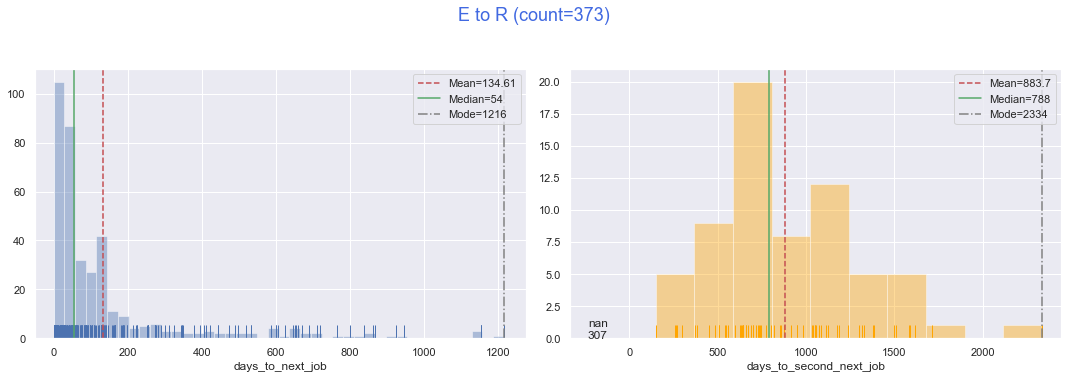

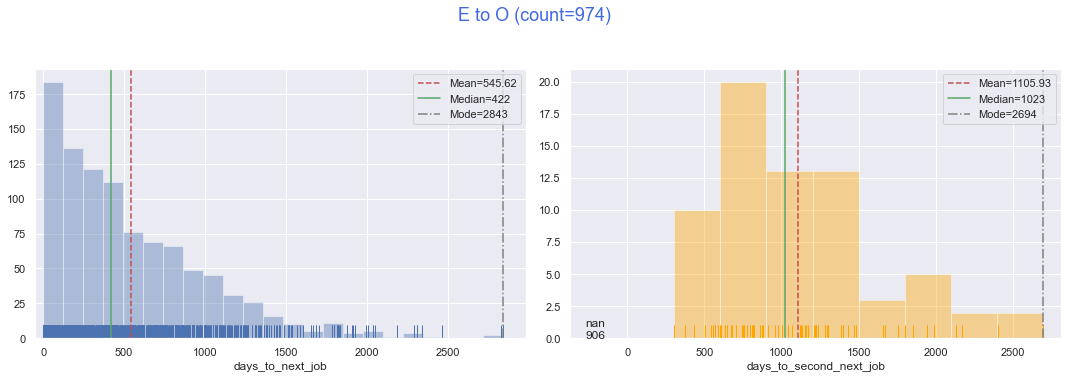

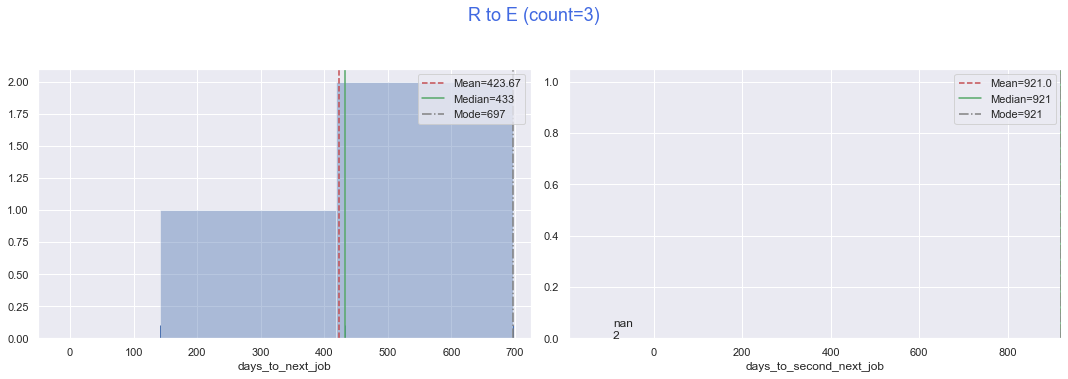

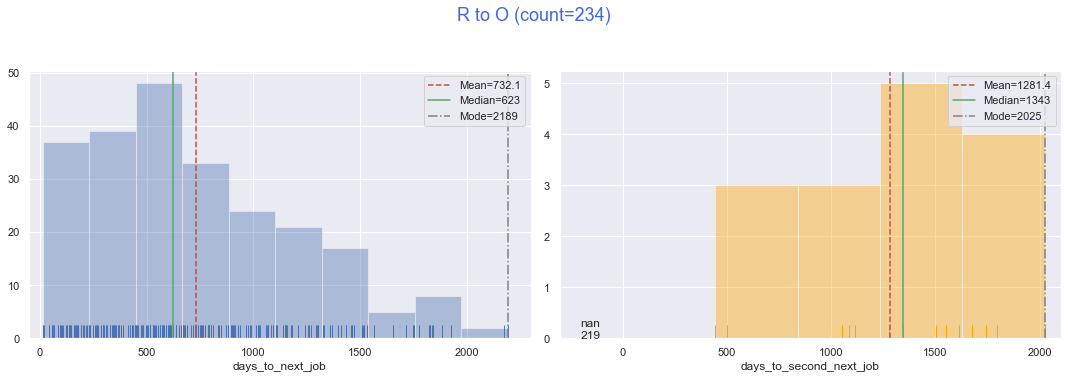

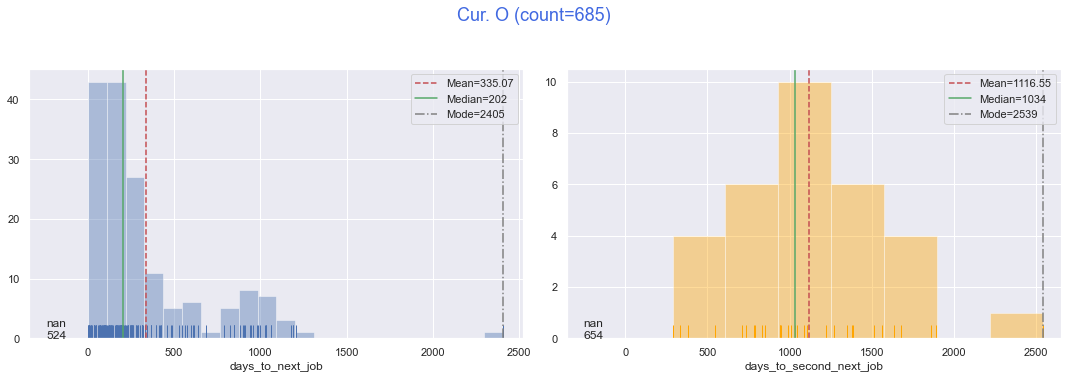

In [24]:
fill_nan = 0
def draw_mmm_legend(series, ax):
    """
    Gives a plot a legend with mean, median and mode values calculated from the input pandas.Series
    Args:T
        series (pandas.Series): the pandas.Series whose mean, median and mode values will be calculated and displayed on the legend
        ax: Ax of the plot, on which a legend should be drawn
    """
    pass
    mean = series.mean()
    median = series.median()
    mode = series.max()

    mean = round(mean, 2) if not pd.isnull(mean) else 'NaN'
    median = int(median) if not pd.isnull(median) else 'NaN'
    mode = int(mode) if not pd.isnull(mode) else 'NaN'

    ax.axvline(mean, color='r', linestyle='--')
    ax.axvline(median, color='g', linestyle='-')
    ax.axvline(mode, color='grey', linestyle='dashdot')
    ax.legend([f'Mean={mean}',f'Median={median}',f'Mode={mode}'], loc='upper right')
    

def subplot_hist(ser, ax, color=None):
    """
    Plots histogram as a subplot
    Args:
        ser (pandas.Series): The pandas.Series containing data to be plotted
        ax: the subplot ax to be plotted on 
        color (str): color for the columns on the histogram 
    """
    if pd.isnull(ser.max()):
        print()
    has_nan = ser.isnull().values.any()
    nan_count = ser.isnull().sum()
    ser_no_nan = ser
    pos_nan_col = -ser_no_nan.max()/10 if not pd.isnull(ser_no_nan.max()) else 0
    if has_nan:
        ser_no_nan = ser.fillna(pos_nan_col)
        
    ax_ = sns.distplot(ser, rug=True, color=color, kde=False, ax=ax)
    ax_.set(xlim=(-50 if not has_nan else pos_nan_col - 100))
    if has_nan:
        ax_.text(pos_nan_col, 0, f'nan\n{nan_count}')

    draw_mmm_legend(ser, ax_)

    
def plot_hist(groups, labels):
    """
    Plots a historgram of days to next and second next employments for some of the 8 job transition groups
    Args:
        groups (list<list<pandas.DataFrame.iterrows>>): the list of 8 job transition groups
        labels (): the respective string labels for each of the 8 job transition groups
    """
    for g, group in enumerate(groups):
        if len(group) == 0 or labels[g] in {'Only R', 'No cur. job', 'Only E'}:
            continue
            
        df_group = pd.DataFrame(group)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        
        subplot_hist(df_group[col_days_to_next_job], axes[0])
        subplot_hist(df_group[col_days_to_second_next_job], axes[1], color='orange')
        
        plt.suptitle(f'{labels[g]} (count={len(df_group.index)})' , fontsize=18, color='royalblue', y=1.05)
        fig.tight_layout()

plot_hist(all_groups, group_names)

# Maintainer identification

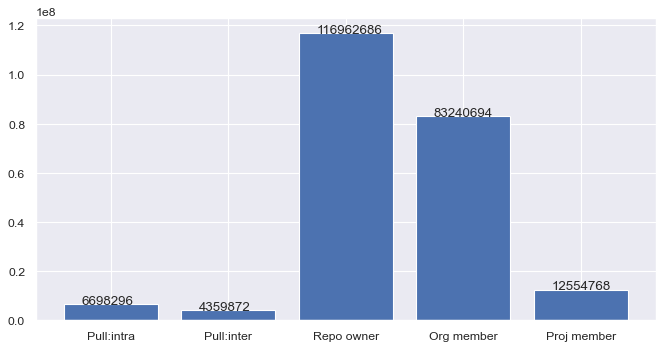

In [30]:
identified_by = ['Pull:intra', 'Pull:inter', 'Repo owner', 'Org member', 'Proj member']

detection_counts = [6698296, 4359872, 116962686, 83240694, 12554768]

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(identified_by , detection_counts)

_write_bar_text('v', detection_counts, len(identified_by), plt)